# Intro to Statistics

* Segment2: Regression
    * linear regression to predict continuous values
        *linear least squares
        * ordinary least square
        * dummies
    * logistic regression to predict categories

<hr>

## Linear Regression

#### Linear Least Squares for Fitting a Line to Points on a Catesian Plane

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

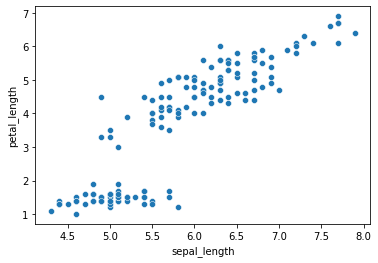

In [2]:
iris = sns.load_dataset('iris')

x = iris.sepal_length
y = iris.petal_length

_ = sns.scatterplot(x=x, y=y)

Consider fitting a line to points on a <strong>Cartesian plane</strong> (2-D surface, with y-axis perpendicular to horizontal x-axis). To fit such a line, the only parameters we require are a y-intercept (say, $\beta_0$) and a slope (say, $\beta_1$):

\begin{align}
\tag{10.1}
y=\beta_0 + \beta_1 x
\end{align}

This corresponds to the case where we have a single feature (a single predictor variable, x) in a regression model:

\begin{align}
\tag{10.2}
y=\beta_0 + \beta_1 x + \epsilon
\end{align}

The $\epsilon$ term denots <strong>error</strong>. For a given instance $i, \epsilon_i$ is a measure of the difference between the true $y_i$ and the model's estimate, $\hat{y_i}$. If the model predicts $y_i$ perfectly, then $\epsilon_i=0$.

Our objective is to find the parameters $\beta_0$ and $\beta_1$ that minimize $\epsilon$ across all the available data points. 

(<strong>Note</strong> that sepal length may not be an ideal example of a predictor variable, but these iris data are conveniently available at this stage of the notebook.)

In the case of a model with a single predictor $x$, there is a fairly straightforward <strong>linear least squares</strong> formula we can use to estimate $\beta_1$:

\begin{align}
\tag{10.3}
\hat{\beta_1} = \frac{\mathrm{cov}(x,y)}{\sigma_x^2}
\end{align}

(We'll dig further into the "least squares" concept in the next section, for now we can think of it as minimizing the squared error $(\hat{y_i}-y_i)^2$, which we isolate from $\mathrm{cov}(x,y)$ via division by $\sigma_x^2$.

In [8]:
n = iris.sepal_width.size
xbar, ybar = x.mean(), y.mean()

product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

cov = sum(product)/n
cov

1.2658200000000006

In [9]:
beta1 = cov/np.var(x)
beta1

1.8584329782548417

With $\hat{\beta_i}$ in hand, we can then rearrange the line equation $(y=\beta_0+\beta_1 x)$ to estimate $\beta_0$:

\begin{align}
\tag{10.4}
\hat{\beta}_0=\bar{y}-\hat{\beta}_1 \bar{x}
\end{align}

In [10]:
beta0 = ybar - beta1*xbar
beta0

-7.101443369602459

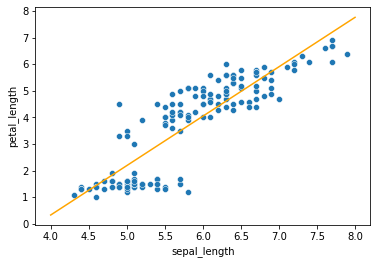

In [11]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

In regression model terms, if we were provided with an sepal length $x_i$ we could now use the parameter estimates $\hat{beta}_0$ and $\hat{beta}_1$ to predict the petal length of an iris.

In [12]:
x_i = 5.5  # assume a 5.5cm-long sepal
y_i = beta0 + beta1*x_i # it would have a 3.1cm-long petal
y_i

3.1199380107991708

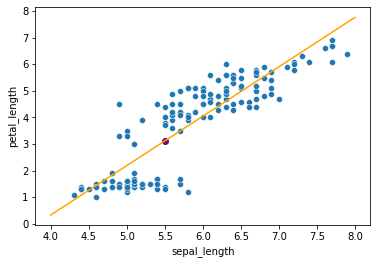

In [13]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

<strong>Exercise</strong>: with data from female Adelie penguins, create a linear least squares model that predicts body mass with flipper length. Predict the mass of a female Adelie penguin that has a flipper length of 197mm.

In [15]:
penguins = sns.load_dataset('penguins').dropna()
adelie = penguins[penguins.species == 'Adelie']
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


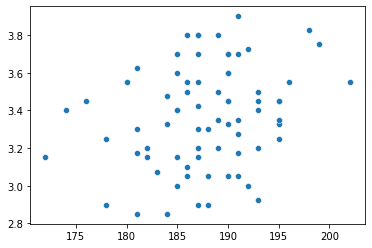

In [17]:
x = adelie[adelie.sex == 'Female']['flipper_length_mm'].to_numpy()
y = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000   # not necessary to convert g to kg

_ = sns.scatterplot(x=x, y=y)

In [18]:
cov_mat = np.cov(x, y)
cov_mat

array([[31.304414  ,  0.3962852 ],
       [ 0.3962852 ,  0.07256564]])

In [19]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

0.012659083726357767

In [20]:
beta0 = y.mean() - beta1*x.mean()
beta0

0.9915290574707036

In [21]:
x_i = 197
y_i = beta0 + beta1*x_i
y_i

3.485368551563184

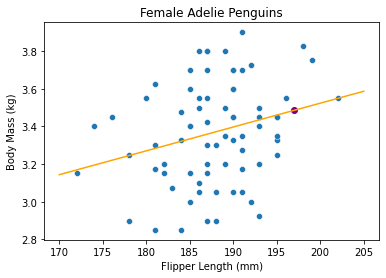

In [22]:
xline = np.linspace(170, 205, 1000)
yline = beta0 + beta1*xline

sns.scatterplot(x=x,y=y)
plt.plot(xline, yline, color='orange')
plt.title("Female Adelie Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (kg)")
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

<hr>

#### Ordinary Least Squares

<strong>Ordinary least squares (OLS)</strong> is a linear least squares method we can use to estimate the parameters of regression models that have more than one predictor variable, e.g.:

\begin{align}
\tag{10.5}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon
\end{align}

Generalizing to $m$ predictors:

\begin{align}
\tag{10.6}
y = \beta_0 + \displaystyle\sum_{i=1}^m{\beta_i x_i}  + \epsilon
\end{align}

In OLS, we minimize the square of residuals (diff. $y_i$ and $\hat{y}_i$) with SSE (...omit the derivation...) 

The OLS approach expands to a wide variety of circumstances:
* Multiple features ($x$, the predictors)
* Polynomial (typically quadratic) features, e.g., $y=\beta_0+\beta_1 x + \beta_2 x^2$
* Interacting features, e.g., $y=\beta_0+\beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$
* Discrete, categorical features, incl. any combination of continuous and discrete features

<hr>

#### Categorical "Dummy" Features

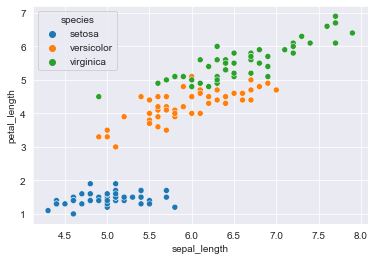

In [23]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [25]:
import pandas as pd

dummy = pd.get_dummies(iris.species)  # convert categorical string to integer string
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [26]:
y = iris.petal_length

In [27]:
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X # virginica as "baseline" where setosa and versicolor are both 0

,sepal_length,setosa,versicolor
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0
...,...,...,...
145,6.7,0,0
146,6.3,0,0
147,6.5,0,0
148,6.2,0,0


In [31]:
import statsmodels.api as sm

X = sm.add_constant(X)
X

,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


In [32]:
model = sm.OLS(y, X)

In [33]:
result = model.fit()

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          1.46e-116
Time:                        17:23:44   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
beta = result.params
beta

const           1.387660
sepal_length    0.632110
setosa         -3.090002
versicolor     -0.879864
dtype: float64

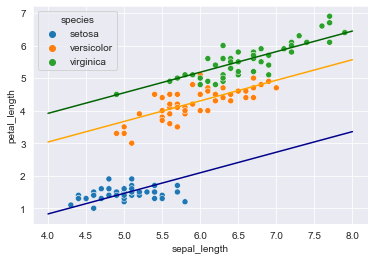

In [37]:
xline = np.linspace(4, 8 , 1000)
vi_yline = beta[0] + beta[1]*xline
se_yline = beta[0] + beta[1]*xline + beta[2]
ve_yline = beta[0] + beta[1]*xline + beta[3]

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

Now using our refined model, such that it predicts the petal length of a *versicolor* iris with a 5.5cm-long sepal:

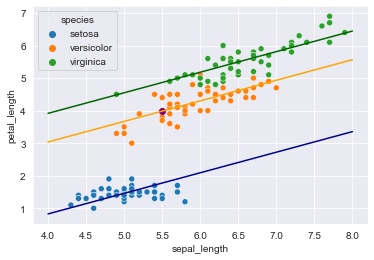

In [39]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

y_i = beta[0] + beta[1]*x_sepall_i + beta[2]*x_setosa_i + beta[3]*x_versic_i

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

<hr>

## Logistic Regression

Reasonably often we'd like to have a regression model that predicts a binary outcome (e.g., identifying if a fast-food item is a hot dog or not a hot dog). This can be accomplished with <strong>logistic regression</strong>, which adapts linear regression by including the *logit* function:

\begin{align}
\tag{10.7}
\log({\frac{p}{1-p}})
\end{align}

This function uses the natural logarithm and maps a binary probability $p$ ( which can only range from zero to one) to an unbounded range ($-\infin$ to $\infin$).

In [40]:
def logit(my_p): # this is also available as scipy.special.logit()
    return np.log(my_p/(1-my_p))

In [41]:
logit(0.5)

0.0

In [42]:
logit(0.1)

-2.197224577336219

In [44]:
logit(0.01)  # closer to zero approaches negative infinity

-4.59511985013459

In [45]:
logit(0.99) # closer to one approaches positive infinity

4.595119850134589

More specifically, logistic regression makes use of the *expit* function (a.k.a., logistic function), which is the inverse of the logit. That is, it returns a probability $p$ when passed some unbounded input $x$:

\begin{align}
\tag{10.8}
p=\frac{1}{1+e^{-x}}
\end{align}

In [46]:
def expit(my_x): # this is also available as scipy.special.expit()
    return 1/(1+np.exp(-my_x))

In [47]:
expit(4.59512)

0.9900000014836675

The logistic function allows us to map the unbounded output of a linear regression model to a probability ranging from zero to one.